In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from NNK2 import NNK
plt.rcParams["figure.figsize"] = [18,10]

In [10]:
raw_data = pd.read_csv('compiled4.csv',usecols=range(1,7))
raw_data.head()

,dateTime,Ouverture,Chamb_Temp,Chamb_CO2,Lyon_Temp,Temp_1H
0,0,0.0,20.260,940.80,-6.300,-0.085
1,3600,0.0,20.175,1063.25,-6.425,-0.250
2,7200,0.0,19.925,1082.00,-6.275,-0.125
3,10800,0.0,19.800,1066.00,-6.125,-0.200
4,14400,0.0,19.600,1062.25,-5.975,-0.025


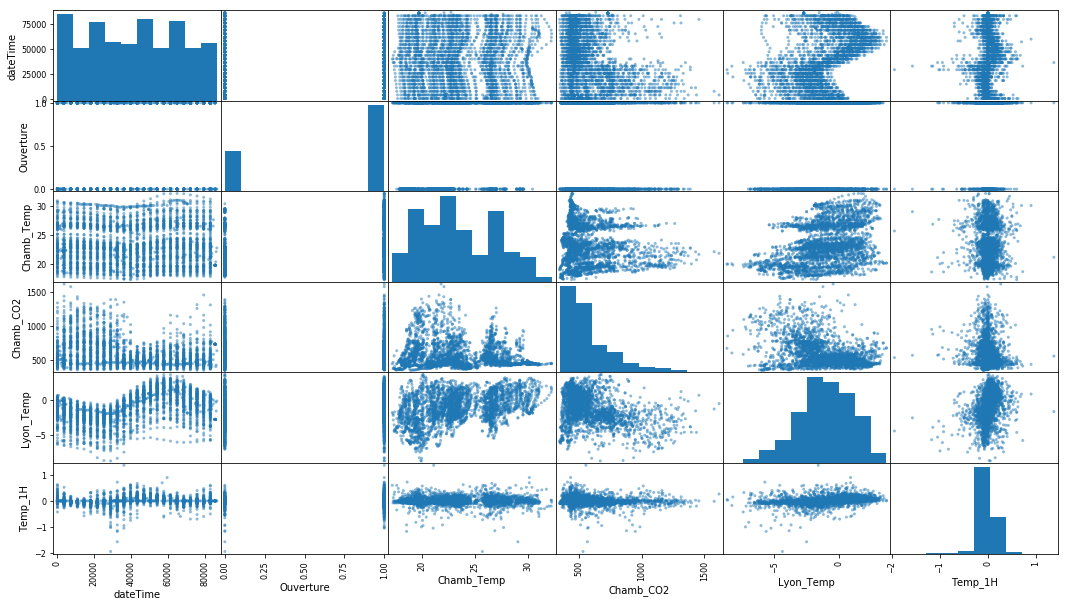

In [11]:
# scatter plot matrix
scatter_matrix(raw_data)
plt.show()

In [12]:
data = raw_data
X = data.values[:,range(5)]
y = data.values[:,5]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8)
ytrain = ytrain.reshape(ytrain.shape[0],1)
ytest = ytest.reshape(ytest.shape[0],1)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((2437, 5), (610, 5), (2437, 1), (610, 1))

In [13]:
# train the normalization
Xscaler = MinMaxScaler(feature_range=(0, 1))
Xscaler = Xscaler.fit(Xtrain)
Xscaler.transform(Xtrain)
# train the normalization
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler = Yscaler.fit(ytrain)
Yscaler.transform(ytrain)

array([[0.5112782 ],
       [0.55639098],
       [0.58646617],
       ...,
       [0.58646617],
       [0.58646617],
       [0.60902256]])

array([[3.25135237e-08, 5.11278195e-01],
       [3.18304830e-08, 5.56390977e-01],
       [1.52757966e-08, 5.86466165e-01],
       ...,
       [2.62794754e-08, 5.86466165e-01],
       [1.80075167e-08, 5.86466165e-01],
       [9.56574639e-09, 6.09022556e-01]])

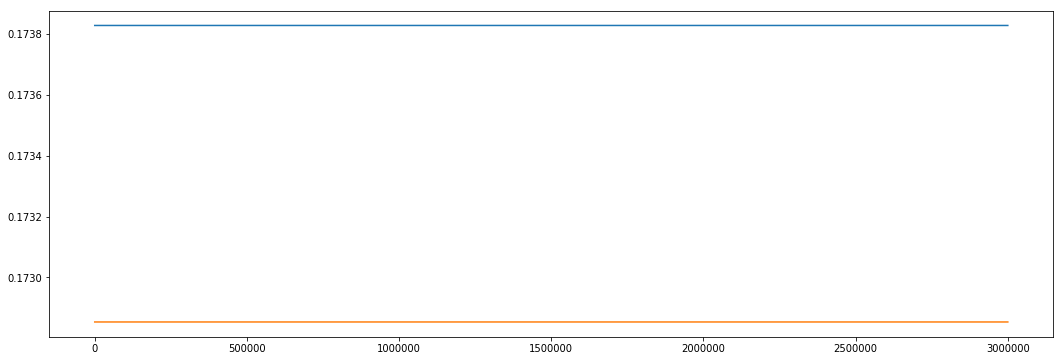

In [19]:
X = Xscaler.transform(Xtrain)
#X = Xtrain
y = Yscaler.transform(ytrain)
NN = NNK(layers = [5,5,1],eta=0.00005,seed=None,factiv='identite',verbose=False)
NN.train(X,y,Xtest=Xscaler.transform(Xtest),ytest=Yscaler.transform(ytest),cycle=3000000)
plt.plot(range(len(NN.lerror)),NN.lerror,NN.lerrorTest)
np.concatenate((NN.predict(X),y),axis=1)

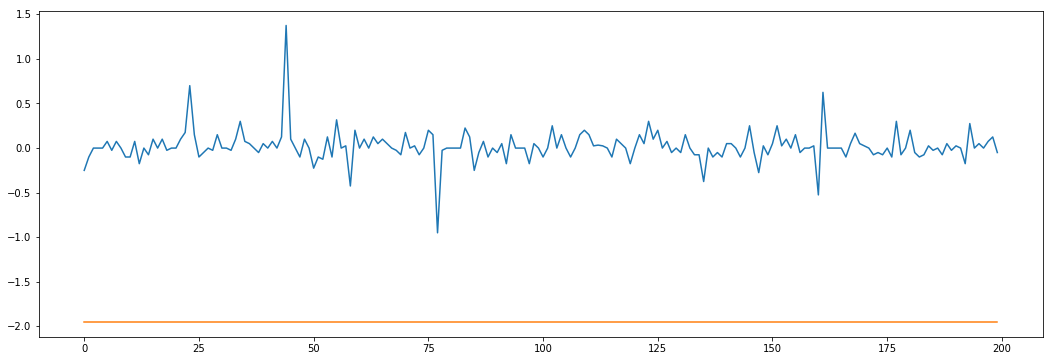

In [20]:
plt.rcParams["figure.figsize"] = [18,6]
plt.plot(np.arange(ytrain.shape[0])[0:200],ytrain[0:200],Yscaler.inverse_transform(NN.predict(X))[0:200])

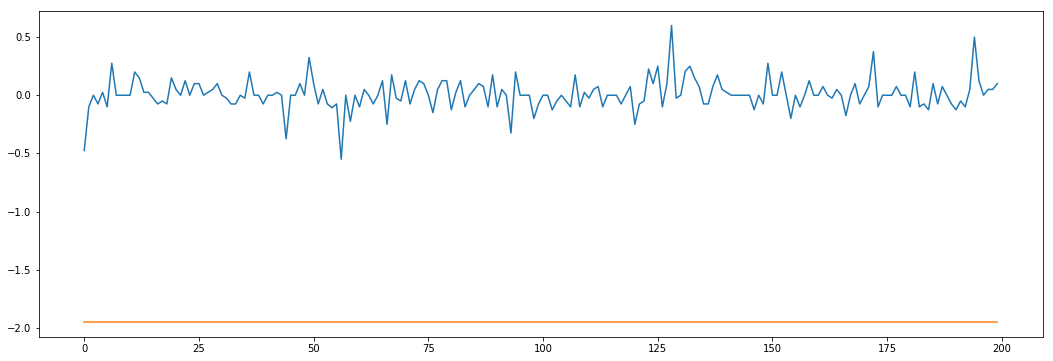

In [21]:
plt.rcParams["figure.figsize"] = [18,6]
plt.plot(np.arange(ytest.shape[0])[0:200],ytest[0:200],Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))[0:200])

In [24]:
np.argmax(ytest - Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest))))

308

In [25]:
ytest[308]

array([-0.05])

In [26]:
Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))[308]

array([-1.3666372])

In [27]:
Xtest[308]

array([  0.   ,   0.   ,  20.4  , 427.5  ,  -6.075])

In [36]:
np.argmin(np.abs(ytest - Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))))

85

In [37]:
ytest[85]

array([0.325])

In [38]:
Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))[85]

array([0.3253312])

In [48]:
np.argsort(np.abs(ytest-Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))),axis=0)[0:10]

array([[ 85],
       [ 58],
       [443],
       [ 77],
       [605],
       [ 32],
       [ 14],
       [409],
       [157],
       [459]])

In [50]:
Xtest[np.argsort(np.abs(ytest-Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))),axis=0)[0:5]]

array([[[ 8.2800e+04,  1.0000e+00,  2.1750e+01,  7.6675e+02,
         -8.2500e-01]],

       [[ 1.0800e+04,  1.0000e+00,  2.7000e+01,  7.3400e+02,
         -1.7500e+00]],

       [[ 2.1600e+04,  0.0000e+00,  2.2400e+01,  1.0390e+03,
         -3.4250e+00]],

       [[ 3.6000e+03,  1.0000e+00,  2.5100e+01,  6.0400e+02,
         -7.0000e-01]],

       [[ 1.8000e+04,  1.0000e+00,  2.3900e+01,  7.6800e+02,
         -2.8500e+00]]])

In [57]:
np.flip(Xtest[np.argsort(np.abs(ytest-Yscaler.inverse_transform(NN.predict(Xscaler.transform(Xtest)))),axis=0)],0)[0:5]

array([[[ 0.0000e+00,  0.0000e+00,  2.0400e+01,  4.2750e+02,
         -6.0750e+00]],

       [[ 1.0800e+04,  0.0000e+00,  2.0200e+01,  4.2150e+02,
         -5.8750e+00]],

       [[ 7.2000e+04,  0.0000e+00,  1.9100e+01,  3.5325e+02,
         -5.9750e+00]],

       [[ 2.1600e+04,  1.0000e+00,  1.8200e+01,  3.5500e+02,
         -6.1500e+00]],

       [[ 1.4400e+04,  0.0000e+00,  2.0575e+01,  3.6950e+02,
         -5.4250e+00]]])

In [75]:
NN.values

[array([[0.45866247, 1.        , 0.63043478, 0.31504425, 0.73225152],
        [0.25017953, 1.        , 0.40133779, 0.15378564, 0.53752535],
        [0.3335727 , 0.        , 0.82274247, 0.26430678, 0.53144016],
        ...,
        [0.3335727 , 0.        , 0.61204013, 0.36499508, 0.36713996],
        [0.37526929, 1.        , 0.47993311, 0.07885939, 0.63488844],
        [0.62544882, 0.        , 0.26254181, 0.28121927, 0.59634888]]),
 array([[-7.25886928e-05, -2.31800420e-05, -3.36686452e-05,
          2.67244277e-06,  2.37002232e-05],
        [-6.38883101e-05, -4.41014376e-06, -3.87144032e-05,
          1.17729619e-05,  1.34440907e-05],
        [-2.02371528e-05, -4.74237964e-05,  9.63144612e-06,
         -1.03127968e-05,  3.82765565e-05],
        ...,
        [-1.47286403e-05, -3.96037058e-05,  1.05899345e-05,
         -1.41040758e-05,  2.60888246e-05],
        [-6.96555723e-05, -1.31773827e-05, -3.48138948e-05,
          9.24698189e-06,  1.92202987e-05],
        [-2.81488605e-05, -3.960

In [2]:
NN1 = NNK(layers = [1,1],eta=0.5,seed=None,factiv='identite',verbose=False)
num=np.arange(0,0.5,0.01)
num = num.reshape(num.shape[0],1)

In [34]:
print(NN1.weights)
NN1.train(num,num*2,cycle=10000)
print(NN1.errors)
print(NN1.weights)
print(np.concatenate((NN1.values[-1],num*2),axis=1))

[array([[3.99921942]])]
[array([0.]), array([[0.00000000e+00],
       [2.53873599e-12],
       [1.01549439e-11],
       [2.28486239e-11],
       [4.06197758e-11],
       [6.34683997e-11],
       [9.13944955e-11],
       [1.24398063e-10],
       [1.62479103e-10],
       [2.05637615e-10],
       [2.53873599e-10],
       [3.07187054e-10],
       [3.65577982e-10],
       [4.29046382e-10],
       [4.97592253e-10],
       [5.71215597e-10],
       [6.49916413e-10],
       [7.33694700e-10],
       [8.22550460e-10],
       [9.16483691e-10],
       [1.01549439e-09],
       [1.11958257e-09],
       [1.22874822e-09],
       [1.34299134e-09],
       [1.46231193e-09],
       [1.58670999e-09],
       [1.71618553e-09],
       [1.85073853e-09],
       [1.99036901e-09],
       [2.13507696e-09],
       [2.28486239e-09],
       [2.43972528e-09],
       [2.59966565e-09],
       [2.76468349e-09],
       [2.93477880e-09],
       [3.10995158e-09],
       [3.29020184e-09],
       [3.47552957e-09],
       [3.66